## Pandas for the NBA Lover
## Selecting Data

Now that we are familiar with the basic components of a DataFrame, let's take a look at how we can select data inside a Dataframe. While doing so, we will take a closer look at how Player Efficiency Rating (PER) and Real Plus-Minus (RPM) relate to team success.

Let's get started!

---

Let's load up our data again, using the first column (player names) as the Index. 

In [1]:
import pandas as pd

# formatting options: 
pd.set_option('display.max_rows', 10)

In [2]:
df = pd.read_csv('../data/advanced_metrics.csv', index_col=0)

### Selecting Data

#### Selecting Columns

One way to think about a DataFrame is as a dictionary for columns of data - we can use a column label to get the associated data just like we would use a key in a dictionary to get its associated value. Here we select each player's average minutes per game.

In [3]:
df['MPG']

PLAYER
James Harden       37.1
Anthony Davis      36.9
Paul George        35.7
Nikola Jokic       31.3
Kyrie Irving       32.1
                   ... 
Allonzo Trier      22.1
Frank Ntilikina    21.1
Kevin Knox         26.6
Jamal Crawford     17.2
Collin Sexton      29.6
Name: MPG, Length: 343, dtype: float64

When the column label is also a valid Python variable name, column data can also be accessed as an attribute on the DataFrame. (If you are a working in an environment such as IPython or a Jupyter Notebook, columns that are accessible as attributes have the added benefit of being elgible for tab completion).

In [4]:
df.MPG

PLAYER
James Harden       37.1
Anthony Davis      36.9
Paul George        35.7
Nikola Jokic       31.3
Kyrie Irving       32.1
                   ... 
Allonzo Trier      22.1
Frank Ntilikina    21.1
Kevin Knox         26.6
Jamal Crawford     17.2
Collin Sexton      29.6
Name: MPG, Length: 343, dtype: float64

To select multiple columns at once, use a list of column labels as the "key":

In [5]:
df[['MPG', 'POS', 'TEAM']]

,MPG,POS,TEAM
PLAYER,,,
James Harden,37.1,PG,HOU
Anthony Davis,36.9,PF,NO
Paul George,35.7,SF,OKC
Nikola Jokic,31.3,C,DEN
Kyrie Irving,32.1,PG,BOS
...,...,...,...
Allonzo Trier,22.1,SG,NY
Frank Ntilikina,21.1,PG,NY
Kevin Knox,26.6,SF,NY


Note: The outputs are styled differently because selecting a single column returns a Series, while selecting multiple columns returns another DataFrame. (Series objects are always renedered by the notebook in plain font and without styling). It always helps to know what type of object you are working with, as some methods only apply to Series and not DataFrames, or vice versa.

### The Label Selector

Because this type of exploratory data analysis is so common, pandas makes it very easy to select the data in a column using column labels. But we can also select data using row labels - that is, the values that populate the Index - using the `.loc` method.

For example, we can use `.loc` to select all statistics related to James Harden:

In [6]:
harden = df.loc['James Harden']
harden

MPG      37.1
TEAM      HOU
POS        PG
TS%     0.622
AST      20.8
        ...  
REBR      9.3
PER     29.21
ORPM     7.76
DRPM    -0.06
RPM       7.7
Name: James Harden, Length: 14, dtype: object

This returns a row of our DataFrame as a Series object. As a quick aside, note that index of this Series is exactly the same as the columns of our original DataFrame:

In [7]:
harden.index is df.columns

True

This gives us enough knowledge to solidify our understanding of the relationship between a DataFrame, Series, and Index that we introduced in the previous tutorial. **Selecting a single DataFrame column returns a Series with the same index as the original DataFrame, while selecting a single DataFrame row returns a Series with the original DataFrame's columns as its index.**

The `.loc` method can be used in many ways. You can provide a "slice" of labels (provided the two labels bounding the slice exist):

In [8]:
df.loc['James Harden':'Kyrie Irving']

,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,,
James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
Anthony Davis,36.9,NO,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
Paul George,35.7,OKC,SF,0.574,13.0,9.0,29.6,4.3,19.3,11.7,23.29,3.82,2.85,6.67
Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52


Or a list of a labels:

In [9]:
df.loc[['James Harden', 'Kyrie Irving', 'Paul George']]

,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,,
James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52
Paul George,35.7,OKC,SF,0.574,13.0,9.0,29.6,4.3,19.3,11.7,23.29,3.82,2.85,6.67


We learned above that column names are also labels, so the `.loc` method can also be used to select columns by passing in a second parameter, containing a column label. Like the row labels, these can a single label, a list of labels, or a slice of labels:

In [10]:
df.loc['James Harden', 'AST']

20.8

In [11]:
df.loc[['James Harden', 'Anthony Davis', 'Nikola Jokic'], ['MPG', 'TEAM', 'TS%', 'USG']]

,MPG,TEAM,TS%,USG
PLAYER,,,,
James Harden,37.1,HOU,0.622,40.0
Anthony Davis,36.9,NO,0.598,29.3
Nikola Jokic,31.3,DEN,0.587,29.1


Side note: James Harden's combination of TS% and USG is absolutely incredible...

In [12]:
df.loc['James Harden':'Kyrie Irving', 'MPG':'TO']

,MPG,TEAM,POS,TS%,AST,TO
PLAYER,,,,,,
James Harden,37.1,HOU,PG,0.622,20.8,13.5
Anthony Davis,36.9,NO,PF,0.598,14.3,6.7
Paul George,35.7,OKC,SF,0.574,13.0,9.0
Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0
Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9


Finally, it's important to note that the labels in the Index do not have to be unique. Say, for instance, we were more interested at player metrics at the team level rather than the player level. To do so, we can use pandas built-in methods to manipulate our DataFrame to use team names instead of player names:

In [13]:
# reset_index turns a DataFrame's index back to its default index
df_with_team_index = df.reset_index().set_index('TEAM')
df_with_team_index

,PLAYER,MPG,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
TEAM,,,,,,,,,,,,,,
HOU,James Harden,37.1,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
NO,Anthony Davis,36.9,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
OKC,Paul George,35.7,SF,0.574,13.0,9.0,29.6,4.3,19.3,11.7,23.29,3.82,2.85,6.67
DEN,Nikola Jokic,31.3,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
BOS,Kyrie Irving,32.1,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NY,Allonzo Trier,22.1,SG,0.543,14.2,13.7,20.8,2.2,11.5,6.6,11.50,-2.34,-2.96,-5.30
NY,Frank Ntilikina,21.1,PG,0.439,23.4,12.5,17.1,1.1,8.7,4.7,6.14,-3.29,-2.30,-5.59
NY,Kevin Knox,26.6,SF,0.482,6.2,8.5,21.2,3.1,13.5,8.1,9.58,-2.24,-3.78,-6.02


And selecting stats for all players on a team is very easy:

In [14]:
df_with_team_index.loc['HOU']

,PLAYER,MPG,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
TEAM,,,,,,,,,,,,,,
HOU,James Harden,37.1,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
HOU,Chris Paul,33.2,PG,0.544,31.6,11.7,24.8,2.0,12.0,6.9,18.20,1.67,1.13,2.80
HOU,PJ Tucker,35.1,SF,0.566,13.1,9.3,9.8,4.4,15.8,9.9,9.09,-0.97,1.72,0.75
HOU,Danuel House Jr.,24.1,SF,0.639,11.7,9.7,13.4,3.8,13.7,8.6,13.00,0.51,-0.38,0.13
HOU,Gerald Green,20.3,SG,0.582,4.9,8.9,17.3,2.6,12.4,7.4,11.33,0.60,-0.79,-0.19
HOU,Clint Capela,34.1,C,0.642,8.6,9.5,19.1,16.0,26.2,21.0,24.72,-0.67,-0.20,-0.87
HOU,James Ennis III,23.0,SF,0.619,9.4,8.4,12.1,4.4,8.7,6.5,11.13,-0.49,-0.48,-0.97
HOU,Gary Clark,15.2,PF,0.476,12.5,1.8,9.9,3.9,16.5,10.0,9.08,-1.58,-0.02,-1.60
HOU,Eric Gordon,33.2,SG,0.498,11.1,7.7,22.3,1.3,7.1,4.2,10.13,0.82,-2.77,-1.95


When you know the type of analysis you want to perform, familarity with the mechanics of a DataFrame can save you a good amount of effort. 

### The Index Selector

The next method for selecting data, `.iloc`, is very similar to `.loc`. But rather than using row labels, `.iloc` uses positional indexers. 

These positional indexers work like they do for python lists. We can use `.iloc[0]` to select the first row of our DataFrame:

In [15]:
df.iloc[0]

MPG      37.1
TEAM      HOU
POS        PG
TS%     0.622
AST      20.8
        ...  
REBR      9.3
PER     29.21
ORPM     7.76
DRPM    -0.06
RPM       7.7
Name: James Harden, Length: 14, dtype: object

A list of positional indexes also works:

In [16]:
df.iloc[[0, 1, 4]]

,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,,
James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
Anthony Davis,36.9,NO,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52


Or a slice of indexes:

In [17]:
df.iloc[0:5]

,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,,
James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
Anthony Davis,36.9,NO,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
Paul George,35.7,OKC,SF,0.574,13.0,9.0,29.6,4.3,19.3,11.7,23.29,3.82,2.85,6.67
Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52


Just like `.loc`, `.iloc` also accepts a second parameter, for selecting columns by their positions. Not suprisingly, this can be a single position, a list of positions, or a slice of positions:

In [18]:
df.iloc[0, 0]

37.1

In [19]:
df.iloc[[0, 1, 2], [0, 1, 2, 3]]

,MPG,TEAM,POS,TS%
PLAYER,,,,
James Harden,37.1,HOU,PG,0.622
Anthony Davis,36.9,NO,PF,0.598
Paul George,35.7,OKC,SF,0.574


In [20]:
df.iloc[3:7, 5:13]

,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM
PLAYER,,,,,,,,
Nikola Jokic,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83
Kyrie Irving,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92
Stephen Curry,10.2,31.1,2.2,13.6,8.1,25.96,5.15,0.12
Nikola Vucevic,8.9,27.3,8.7,33.8,21.0,25.90,1.94,3.22


I know what you're thinking - what is Nikola Vucevic doing on this list? 

### Conclusion


Let's now apply what we have learned about selecting data to take a closer look at our advanced player metrics. We can begin by taking a look at RPM and PER statistics for some the three best and three worst teamas in the league.

To do so, we will take the `df_with_team_index` dataframe we created above, and use the `.loc` selector to select data for our teams of interest. This data can then be passed into a plotting function to visualize how PER and RPM vary across good and bad teams. (The details of how the plot is generated are hidden away in a function, and will be covered in depth in a later tutorial).

Players on each team with a RPM or PER greater than the league average are colored in the darker color (remember that the league-wide average for PER is 15).

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

from plotting import plot_team

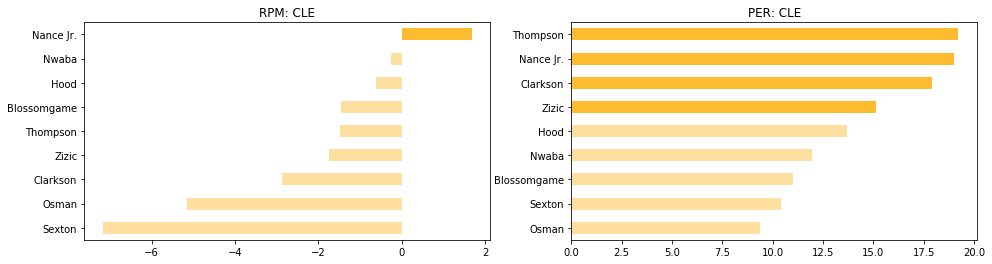

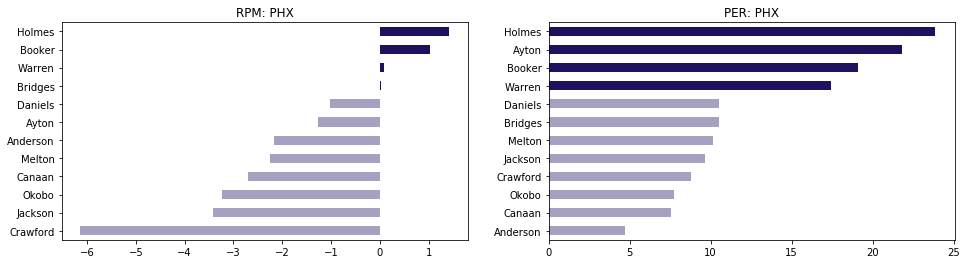

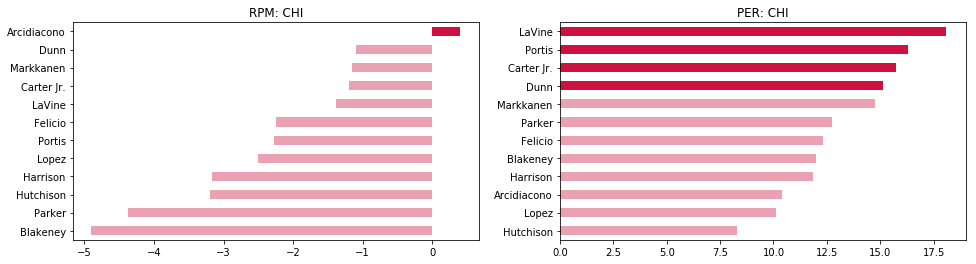

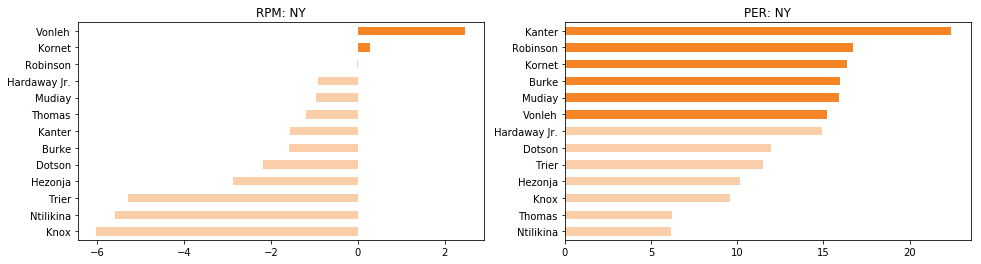

In [21]:
bad_teams = ['CLE', 'PHX', 'CHI', 'NY']
for team in bad_teams:
    team_data = df_with_team_index.loc[team]
    plot_team(team_data)

Even the worst teams in the NBA have three or four players who are more "productive/efficient" than league average in terms of PER. At the same time, most players are below 0 in RPM, while some shockingly bad (hello Jamal Crawford, Collin Sexton). Constrast that to the RPM distribution for good teams, where a majority of the players are positive:

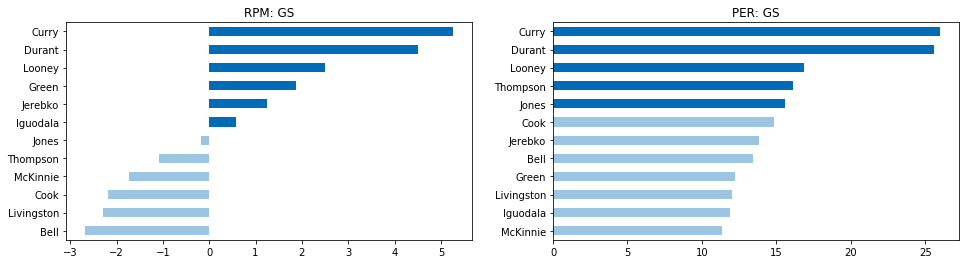

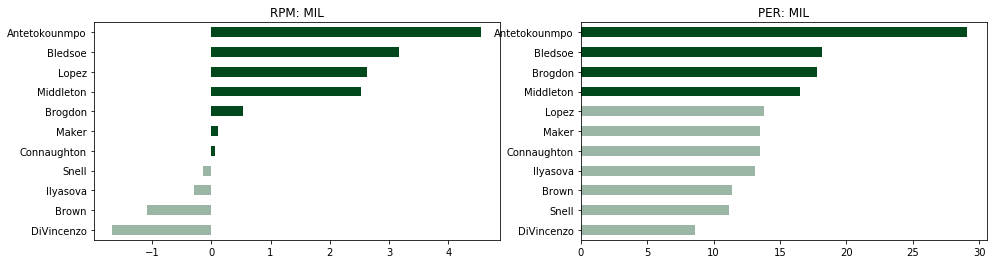

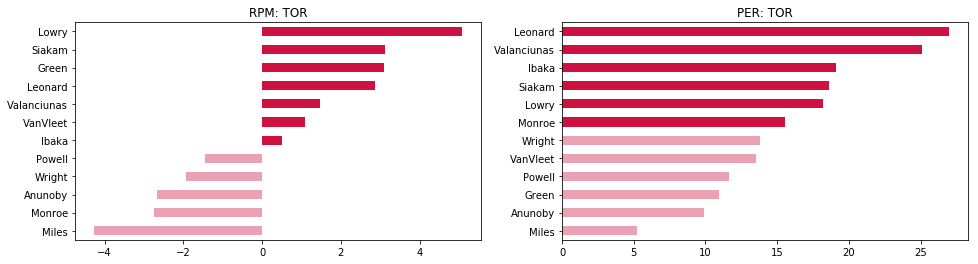

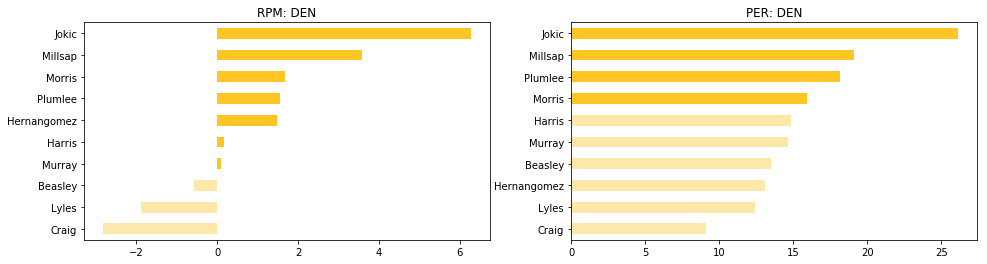

In [22]:
good_teams = ['GS', 'MIL', 'TOR', 'DEN']
for team in good_teams:
    team_data = df_with_team_index.loc[team]
    plot_team(team_data)

This should come as no suprise, as RPM is rooted in team point-differential, and bad teams are usually trailing. What's more interesting to me is that there is no noticeable difference in the ratio of players above or below league average in PER amongst good and bad teams. Take the Knicks as an example, who have 6 players above league average in PER, while the Bucks have 4.

This observation is illustrative of one of the shortcomings of PER as a metric. PER is based solely on box score statistics, numbers that players will put up regardless if their team wins or loses - Devin Booker scoring 70 points in a losing cause being an extreme example. It's as 

On the flip side, there are aspects of winning basketball that box scores fail to measure, most notably on the defensive side of the ball, and PER undervalues players who excel at those aspects of the game. Danny Green, Draymond Green, and Marcus Smart are prominent examples of players who are below league average in PER, yet rank high in RPM, in large part due to their defensive contributions:

In [26]:
df.loc[['Danny Green', 'Draymond Green', 'Marcus Smart'], ['PER', 'RPM', 'DRPM', 'ORPM']]

,PER,RPM,DRPM,ORPM
PLAYER,,,,
Danny Green,10.94,3.11,2.13,0.98
Draymond Green,12.22,1.88,3.84,-1.96
Marcus Smart,12.90,3.52,2.42,1.10


On the other hand, a player might be undervalued by RPM simply because his team is bad. From our charts above, we can see that all bad teams have at least one player who is positive in RPM - what does that tell us about those players? Are these "good" players whose contributions are being wasted by lack of surrounding talent? Or are these numbers flukes, more attributable to quirks in how RPM is calculated? 

Unfortunately, I don't have an answer - finding answers to these questions are difficult, but they are a large part of why the NBA is so intriguing to basketball nerds like us.